In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv('E:/New folder/titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Set index

In [51]:
data.set_index(data['PassengerId'], inplace=True)
data.drop('PassengerId', axis=1, inplace=True)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Visualizing data

C:\Users\SR1407SM1106\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


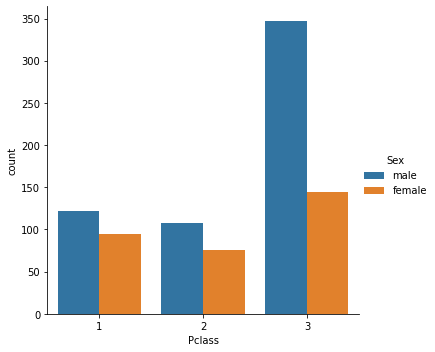

In [55]:
sns.factorplot('Pclass', data=data, hue='Sex', kind='count')
plt.show()

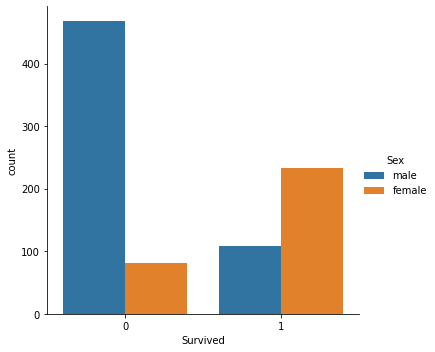

In [56]:
sns.factorplot('Survived', data=data, hue='Sex', kind='count')

### Females are survived in majority

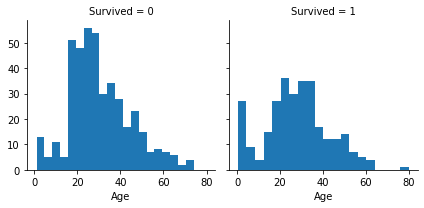

In [57]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### More death and survival is between age 18 and 38

## Remove NaN

In [58]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [59]:
data['Age'].fillna((data['Age'].mode()[0]), inplace=True)

In [60]:
data['Cabin'].fillna((data['Cabin'].mode()[0]), inplace=True)

In [61]:
data['Embarked'].fillna((data['Embarked'].mode()[0]), inplace=True)

In [62]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [63]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S


## Categorical data to numerical

In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_data = ['Sex', 'Embarked', 'Cabin']
for col in cat_data:
    data[col] = le.fit_transform(data[col])
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2
6,0,3,"Moran, Mr. James",1,24.0,0,0,330877,8.4583,47,1
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,129,2
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,47,2
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,47,2


## Split into training and testing data

In [82]:
data_X = data.iloc[:,1:]
data_y = data['Survived']

In [83]:
data_X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2


In [84]:
data_y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8)

In [86]:
print(X_train.shape)
print(y_train.shape)

(712, 10)
(712,)


In [87]:
print(X_test.shape)
print(y_test.shape)

(179, 10)
(179,)


### Remove unnecessary columns in training data

In [97]:
X_train = X_train.drop(['Name'], axis=1)
X_train = X_train.drop(['Ticket'], axis=1)
X_train = X_train.drop(['Fare'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
PassengerId,,,,,,,
366,3,1,30.0,0,0,47,2
287,3,1,30.0,0,0,47,2
26,3,0,38.0,1,5,47,2
86,3,0,33.0,3,0,47,2
259,1,0,35.0,0,0,47,0


In [103]:
X_test = X_test.drop(['Name'], axis=1)
X_test = X_test.drop(['Ticket'], axis=1)
X_test = X_test.drop(['Fare'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
PassengerId,,,,,,,
509,3,1,28.0,0,0,47,2
553,3,1,24.0,0,0,47,1
616,2,0,24.0,1,2,47,2
513,1,1,36.0,0,0,121,2
812,3,1,39.0,0,0,47,2


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
knn.score(X_test, y_test)

0.7039106145251397

In [107]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[87, 26],
       [27, 39]], dtype=int64)

### Accuracy: 70.4%

C:\Users\SR1407SM1106\AppData\Local\Continuum\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


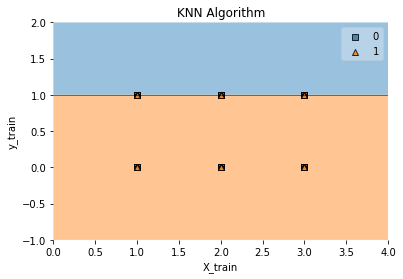

In [109]:
from mlxtend.plotting import plot_decision_regions
X_train_plot=X_train[['Pclass','Sex']]
knn=KNeighborsClassifier()
knn.fit(X_train_plot, y_train)
plot_decision_regions(X_train_plot.to_numpy(), y_train.to_numpy(), clf=knn)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('KNN Algorithm')
plt.show()

## Bagging Classifier

In [110]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(X_train, y_train)
print('Accuracy Score: ', bag.score(X_test, y_test))
y_pred2 = bag.predict(X_test)
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred2))

Accuracy Score:  0.7374301675977654
Confusion Matrix:  [[86 27]
 [20 46]]


### Accuracy: 73.7%

C:\Users\SR1407SM1106\AppData\Local\Continuum\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


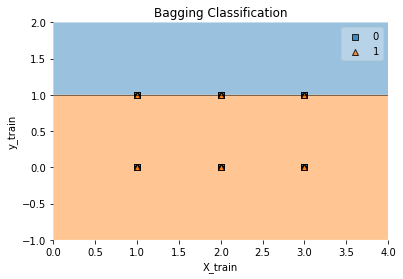

In [111]:
bag = BaggingClassifier()
bag.fit(X_train_plot, y_train)
plot_decision_regions(X_train_plot.to_numpy(), y_train.to_numpy(), clf=bag)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Bagging Classification')
plt.show()

## Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Score: ', dt.score(X_test,y_test))
preed_y = dt.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preed_y)

Score:  0.6983240223463687


array([[82, 31],
       [23, 43]], dtype=int64)

### Accuracy: 69.8%

C:\Users\SR1407SM1106\AppData\Local\Continuum\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


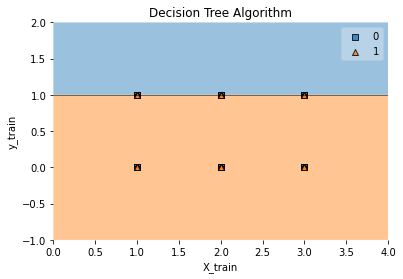

In [113]:
from mlxtend.plotting import plot_decision_regions
dt = DecisionTreeClassifier()
dt.fit(X_train_plot, y_train)
plot_decision_regions(X_train_plot.to_numpy(), y_train.to_numpy(), clf=dt)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Decision Tree Algorithm')
plt.show()

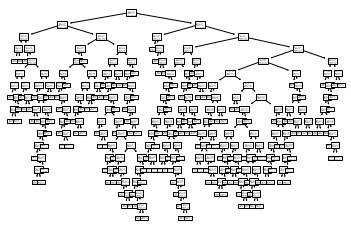

<Figure size 1440x1800 with 0 Axes>

In [120]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.figure(figsize = (20, 25))
plt.show()